<a href="https://colab.research.google.com/github/RezaMathers/RezaMathers/blob/main/scikit_learn_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Scikit-Learn Classification Workflow
### 1. Getting the data ready

In [40]:
import plotly.express as px
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, classification_report

In [41]:
# Get the data
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [43]:
# Set random seed
np.random.seed(23)

# Split the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Training and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 2. Preparing a machine learning model, fitting it and making predictions

In [45]:
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Make predictions and save as variable
y_preds = clf.predict(X_test)

### 3. Evaluate the model's predictions

In [46]:
# Score on training set: should be 100%
clf.score(X_train, y_train)

1.0

In [47]:
# Score on test set
clf.score(X_test, y_test)

0.8032786885245902

## Experimenting with different Classification models
See if you get better results

In [48]:
# Create a dictionary called models containing all the classifiers imported
models = {
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "SVC": SVC(),
    "LinearSVC": LinearSVC(),
    "RandomForestClassifier": RandomForestClassifier()
}

# Empty dictionary for the scores
results = {}

# Loop through the dictionaries to get scores (all have the same score metric)
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)

results

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



{'KNeighborsClassifier': 0.7049180327868853,
 'LinearSVC': 0.819672131147541,
 'LogisticRegression': 0.819672131147541,
 'RandomForestClassifier': 0.8032786885245902,
 'SVC': 0.7213114754098361}

In [49]:
# Visulaize the results
results_df = pd.DataFrame(results.values(), 
                          results.keys(), 
                          columns=["Accuracy"])
px.bar(results_df, x=results_df.index, y="Accuracy", 
       width=1000, height=400, color=results_df.index)

## Hyperparameter Tuning
Logistic Regression and LinearSVC had the best score. Try improving LogisticRegression using `RandomizedSearchCV`

In [50]:
# View the hyperparameters of the LogisticRegression
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [51]:
# Try tuning 'C' and 'solver'
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ["liblinear"]}

# Use RandomizedSearchCV to search for best combination of the hyperparameters
np.random.seed(23)

rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=5,
                                verbose=5)
# Fit this instance
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ........C=0.0001, solver=liblinear;, score=0.755 total time=   0.0s
[CV 2/5] END ........C=0.0001, solver=liblinear;, score=0.694 total time=   0.0s
[CV 3/5] END ........C=0.0001, solver=liblinear;, score=0.646 total time=   0.0s
[CV 4/5] END ........C=0.0001, solver=liblinear;, score=0.646 total time=   0.0s
[CV 5/5] END ........C=0.0001, solver=liblinear;, score=0.604 total time=   0.0s
[CV 1/5] END C=1.623776739188721, solver=liblinear;, score=0.898 total time=   0.0s
[CV 2/5] END C=1.623776739188721, solver=liblinear;, score=0.857 total time=   0.0s
[CV 3/5] END C=1.623776739188721, solver=liblinear;, score=0.812 total time=   0.0s
[CV 4/5] END C=1.623776739188721, solver=liblinear;, score=0.792 total time=   0.0s
[CV 5/5] END C=1.623776739188721, solver=liblinear;, score=0.896 total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, solver=liblinear;, score=0.755 total time=   0.0s
[CV 2/5] END C=0.0006951927

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=5)

In [52]:
# Best hyperparameters from the run
bp = rs_log_reg.best_params_
bp

{'C': 1.623776739188721, 'solver': 'liblinear'}

In [53]:
# Score
rs_log_reg.score(X_test, y_test)

0.8524590163934426

##### Note: score always gives the `accuracy` metric for classifiers

### But when it comes to classification, you'll likely want to use a few more evaluation metrics, including:

  * Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
  * Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.
  * Precision - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
  *Recall - Proportion of true positives over total number of true positives and false positives. Higher recall leads to less false negatives.
  * F1 score - Combines precision and recall into one metric. 1 is best, 0 is worst.
  * Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.
  * ROC Curve - Receiver Operating Characterisitc is a plot of true positive rate versus false positive rate.
  * Area Under Curve (AUC) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

In [54]:
# Instantiate a LogisticRegression classifier using the best_params achieved
clf = LogisticRegression(C=bp['C'],
                         solver=bp['solver'])

# Fit onto training data
clf.fit(X_train, y_train)

LogisticRegression(C=1.623776739188721, solver='liblinear')

In [55]:
# recheck score
clf.score(X_test, y_test)

0.8524590163934426

In [56]:
# New predictions
y_preds = clf.predict(X_test)

In [57]:
# Create a confusion matrix using the confusion_matrix function
confusion_matrix(y_test, y_preds)

array([[25,  5],
       [ 4, 27]])

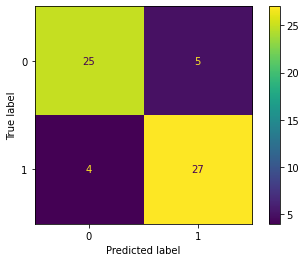

In [58]:
# more visual confusion matrix
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds)

In [60]:
# Create a classification report
classification_report(y_true=y_test,
                      y_pred=y_preds)

'              precision    recall  f1-score   support\n\n           0       0.86      0.83      0.85        30\n           1       0.84      0.87      0.86        31\n\n    accuracy                           0.85        61\n   macro avg       0.85      0.85      0.85        61\nweighted avg       0.85      0.85      0.85        61\n'

Challenge: Write down what each of the columns in this classification report are.

Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
Support - The number of samples each metric was calculated on.
Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).
